# Beamforming - FK Analysis
The following code shows how to do an FK Analysis with ObsPy. The data are from the blasting of the AGFA skyscraper in Munich. We execute array_processing() using the following settings:
* The slowness grid is set to corner values of -3.0 to 3.0 s/km with a step fraction of sl_s = 0.03.
* The window length is 1.0 s, using a step fraction of 0.05 s.
* The data is bandpass filtered, using corners at 1.0 and 8.0 Hz, prewhitening is disabled.
* semb_thres and vel_thres are set to infinitesimally small numbers and must not be changed.
* The timestamp will be written in 'mlabday', which can be read directly by our plotting routine.
* stime and etime have to be given in the UTCDateTime format.

The output will be stored in out.

The second half shows how to plot the output. We use the output out produced by array_processing(), which are numpy ndarrays containing timestamp, relative power, absolute power, backazimuth, slowness. The colorbar corresponds to relative power.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import obspy
from obspy.core.util import AttribDict
from obspy.imaging.cm import obspy_sequential
from obspy.signal.invsim import corn_freq_2_paz
from obspy.signal.array_analysis import array_processing


# Load data
st = obspy.read("https://examples.obspy.org/agfa.mseed")

# Set PAZ and coordinates for all 5 channels
st[0].stats.paz = AttribDict({
    'poles': [(-0.03736 - 0.03617j), (-0.03736 + 0.03617j)],
    'zeros': [0j, 0j],
    'sensitivity': 205479446.68601453,
    'gain': 1.0})
st[0].stats.coordinates = AttribDict({
    'latitude': 48.108589,
    'elevation': 0.450000,
    'longitude': 11.582967})

st[1].stats.paz = AttribDict({
    'poles': [(-0.03736 - 0.03617j), (-0.03736 + 0.03617j)],
    'zeros': [0j, 0j],
    'sensitivity': 205479446.68601453,
    'gain': 1.0})
st[1].stats.coordinates = AttribDict({
    'latitude': 48.108192,
    'elevation': 0.450000,
    'longitude': 11.583120})

st[2].stats.paz = AttribDict({
    'poles': [(-0.03736 - 0.03617j), (-0.03736 + 0.03617j)],
    'zeros': [0j, 0j],
    'sensitivity': 250000000.0,
    'gain': 1.0})
st[2].stats.coordinates = AttribDict({
    'latitude': 48.108692,
    'elevation': 0.450000,
    'longitude': 11.583414})

st[3].stats.paz = AttribDict({
    'poles': [(-4.39823 + 4.48709j), (-4.39823 - 4.48709j)],
    'zeros': [0j, 0j],
    'sensitivity': 222222228.10910088,
    'gain': 1.0})
st[3].stats.coordinates = AttribDict({
    'latitude': 48.108456,
    'elevation': 0.450000,
    'longitude': 11.583049})

st[4].stats.paz = AttribDict({
    'poles': [(-4.39823 + 4.48709j), (-4.39823 - 4.48709j), (-2.105 + 0j)],
    'zeros': [0j, 0j, 0j],
    'sensitivity': 222222228.10910088,
    'gain': 1.0})
st[4].stats.coordinates = AttribDict({
    'latitude': 48.108730,
    'elevation': 0.450000,
    'longitude': 11.583157})


# Instrument correction to 1Hz corner frequency
paz1hz = corn_freq_2_paz(1.0, damp=0.707)
st.simulate(paz_remove='self', paz_simulate=paz1hz)

# Execute array_processing

#timestamp-->> valid values: ‘julsec’ and ‘mlabday’
   #‘julsec’ returns the timestamp in seconds since 1970-01-01T00:00:00
   #‘mlabday’ returns the timestamp in days (decimals represent hours, minutes and seconds)
      #since ‘0001-01-01T00:00:00’ as needed for matplotlib date plotting (see e.g. matplotlib’s num2date)
stime = obspy.UTCDateTime("20080217110515") # start time
etime = obspy.UTCDateTime("20080217110545") # end time
#The dict() constructor creates a dictionary in Python.
kwargs = dict(
    # slowness grid: X min, X max, Y min, Y max, Slow Step
    sll_x=-3.0, slm_x=3.0, sll_y=-3.0, slm_y=3.0, sl_s=0.03,
    # sliding window properties
    win_len=1.0, win_frac=0.05,
    # frequency properties
    frqlow=1.0, frqhigh=8.0, prewhiten=0,
    # restrict output
    semb_thres=-1e9, vel_thres=-1e9, timestamp='mlabday',
    stime=stime, etime=etime
)
out = array_processing(st, **kwargs)

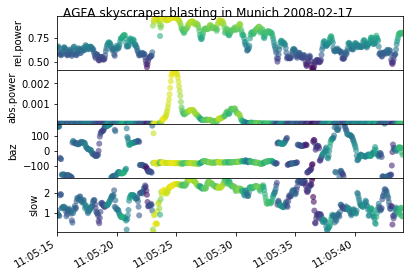

In [7]:
# Plot
labels = ['rel.power', 'abs.power', 'baz', 'slow']

#AutoDateLocator: On autoscale, this class picks the best DateLocator (e.g., RRuleLocator)
   #to set the view limits and the tick locations. If called with interval_multiples=True 
   #it will make ticks line up with sensible multiples of the tick intervals.
   #E.g. if the interval is 4 hours, it will pick hours 0, 4, 8, etc as ticks. This behaviour is not guaranteed by default.
xlocator = mdates.AutoDateLocator()
fig = plt.figure()
for i, lab in enumerate(labels):
    ax = fig.add_subplot(4, 1, i + 1)
    #.scatter(x, y, c:color, sequence, or sequence of color, optional, alpha, )
    ax.scatter(out[:, 0], out[:, i + 1], c=out[:, 1], alpha=0.6,
               edgecolors='none', cmap=obspy_sequential) #cmap=obspy_sequential is Default
    ax.set_ylabel(lab)
    ax.set_xlim(out[0, 0], out[-1, 0])
    ax.set_ylim(out[:, i + 1].min(), out[:, i + 1].max())
    ax.xaxis.set_major_locator(xlocator)
    ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(xlocator))

fig.suptitle('AGFA skyscraper blasting in Munich %s' % (
    stime.strftime('%Y-%m-%d'), ))
fig.autofmt_xdate()
fig.subplots_adjust(left=0.15, top=0.95, right=0.95, bottom=0.2, hspace=0)
plt.show()

#### Python Dict()

In [3]:
numbers = dict(x=5, y=0)
print('numbers = ',numbers)
print(type(numbers))

empty = dict()
print('empty = ',empty)
print(type(empty))

numbers =  {'x': 5, 'y': 0}
<class 'dict'>
empty =  {}
<class 'dict'>


#### Usage of **kwargs
<br>
<br>**kwargs allows you to pass keyworded variable length of arguments to a function. You should use 
**kwargs if you want to handle named arguments in a function. Here is an example to get you going with it:

In [4]:
def greet_me(**kwargs):
    for key, value in kwargs.items():
        print("{0} = {1}".format(key, value))

In [5]:
greet_me(name="yasoob")

name = yasoob


In [6]:
out

array([[  7.33089462e+05,   6.52644178e-01,   6.11041867e-10,
          1.63009177e+02,   1.12929181e+00],
       [  7.33089462e+05,   6.53867818e-01,   6.30205356e-10,
          1.58838740e+02,   9.97246208e-01],
       [  7.33089462e+05,   6.65975667e-01,   6.91755206e-10,
          1.58552264e+02,   9.02496537e-01],
       ..., 
       [  7.33089462e+05,   7.95888898e-01,   3.25494665e-09,
          1.84349488e+01,   1.23328829e+00],
       [  7.33089462e+05,   7.93125818e-01,   3.70422322e-09,
         -1.25288077e+01,   8.29759001e-01],
       [  7.33089462e+05,   8.07306556e-01,   3.91249926e-09,
         -2.74744316e+01,   8.45340168e-01]])